<h1>Linear Regression</h1>


Linear regression is a branch of supervised learning within the regression class. 

Linear regression involves the prediction of output variables from an independent input variable, in this case, a student's second grade is predicted from the students first grade. This is achived through the calculation of the best linear equation which correlates to the relationship between the two variables. This linear equation is then displayed as a graph and additionaly used as the function to predict what a dependent variable's value will be given the independent value.

In [13]:
# Import librarys
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style
from scipy import stats

# Assign data values held in "student-mat.csv" to data variable
data = pd.read_csv("student-mat.csv", sep=";")
print(data.head()) # Print first five rows of "data"

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [14]:
# Assign desired categories to data variable
data = data[["G3", "G2", "G1"]]
print(data.head()) # Print first five rows of "data"

   G3  G2  G1
0   6   6   5
1   6   5   5
2  10   8   7
3  15  14  15
4  10  10   6


In [15]:
# Find data correlation between column "G1" to columns "G2" and "G3"
correlation_matrix = data.corr()
print(correlation_matrix['G1'])

G3    0.801468
G2    0.852118
G1    1.000000
Name: G1, dtype: float64


In [16]:
# Result = G2 has a greater correlation so it will be used

x = data.loc[:, 'G1'] # Assign G1 column values to x variable
y = data.loc[:, 'G2'] # Assign G2 column values to y variable
print(x,y) # Print variables 

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64 0       6
1       5
2       8
3      14
4      10
       ..
390     9
391    16
392     8
393    12
394     9
Name: G2, Length: 395, dtype: int64


In [17]:
slope, intercept, r, p,  std_err = stats.linregress(x, y)
# Slope = steepness of line, intercept = y intercept, r = correlation between variables, std_err = standard error


In [18]:
def linfunc(x):
    return slope * x + intercept #y=mx formula

#generates points to plot on graph
mymodel = list(map(linfunc, x))



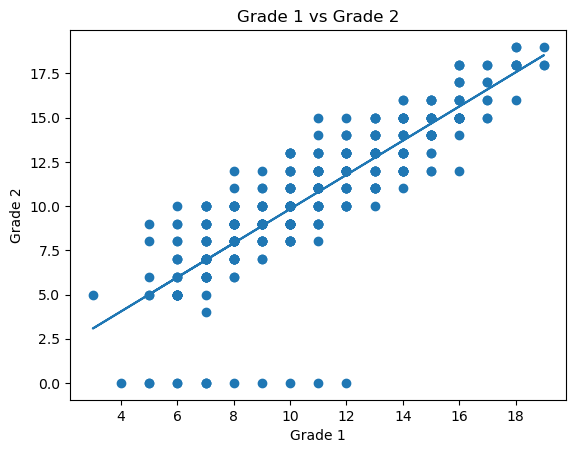

In [19]:
# Labling the axis and title 
plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.title('Grade 1 vs Grade 2')

# Ploting the values
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() # Generate graph

In [20]:
# Adjust variables to drop 0 values

adjustedX = []
adjustedY = []
# Loop function runs through each value in y, if it does not equal 0, the value is appended to adjusted x and y
for i in range(0,len(y)-1):
    if y[i] != 0:
        adjustedX.append(x[i])
        adjustedY.append(y[i])
        
# Convert list to a pd series
x = pd.Series(adjustedX)
y = pd.Series(adjustedY)

def linfunc(x):
    return slope * x + intercept #y=mx

#generates points to plot on graph
slope, intercept, r, p,  std_err = stats.linregress(x, y)
mymodel = list(map(linfunc, x))

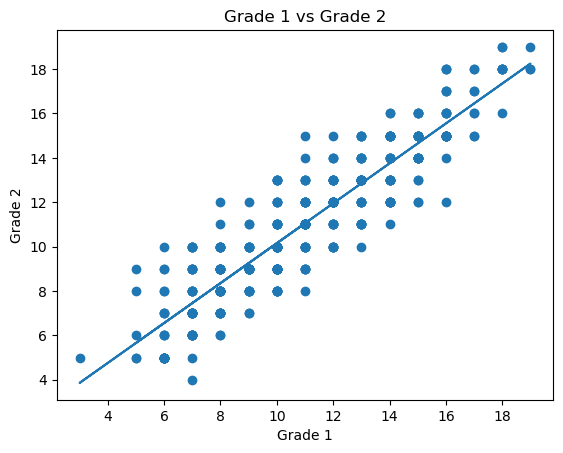

In [21]:
# Labling the axis and title 
plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.title('Grade 1 vs Grade 2')

# Ploting the values
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() # Generate graph

In [22]:
# Prediction fucntion 
predict = "G3"

# Assign data to x and y values
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

# Split data into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

linear = linear_model.LinearRegression()

# Define the line of best fit
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

0.8958893576655845
Coefficient: 
 [0.98997552 0.1418332 ]
Intercept: 
 -1.7202083366273708


In [23]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

-0.4437095251995895 [0 9] 0
8.324236936022855 [9 8] 8
9.314212454077543 [10  8] 10
11.861496295265935 [12 12] 12
8.607903338562362 [ 9 10] 9
11.861496295265935 [12 12] 12
9.59787885661705 [10 10] 10
7.617927820507672 [ 8 10] 9
9.881545259156558 [10 12] 11
11.861496295265935 [12 12] 11
13.13513821586013 [13 14] 13
18.794181812482343 [18 19] 19
14.266946935184572 [14 15] 15
8.324236936022855 [9 8] 8
11.861496295265935 [12 12] 11
4.222501662534347 [5 7] 0
12.286995899075196 [12 15] 12
12.993305014590376 [13 13] 14
7.1924282166984135 [8 7] 0
14.266946935184572 [14 15] 14
17.52053989188815 [17 17] 18
15.398755654509015 [15 16] 15
12.993305014590376 [13 13] 12
15.25692245323926 [15 15] 15
15.398755654509015 [15 16] 15
4.080668461264594 [5 6] 0
-1.0110423302786034 [0 5] 0
4.928810778049528 [6 5] 6
16.388731172563702 [16 16] 16
12.003329496535688 [12 13] 12
14.12511373391482 [14 14] 14
12.709638612050869 [13 11] 14
14.12511373391482 [14 14] 14
10.729687575941492 [11 11] 11
13.13513821586013 [1

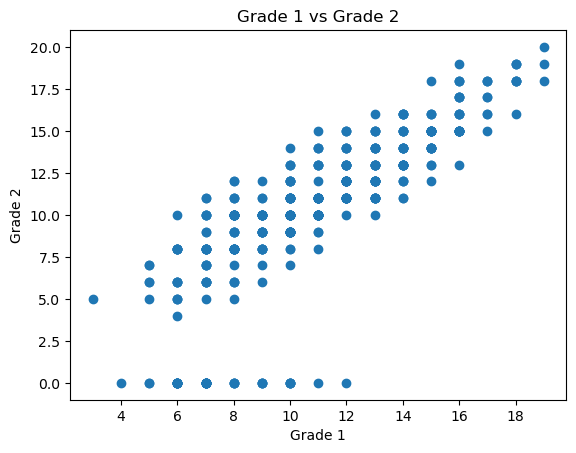

In [24]:
plt.scatter(data["G1"], data["G3"])

plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.title('Grade 1 vs Grade 2')

plt.show() # Generate prediction graph